# Capítulo 2

### Seção 2.1
O capítulo começa fazendo uma distinção entre aprendizado supervisionado e não-supervisionado. Ambos possuem um ponto $x_i$ do *dataset*, com a versão supervisionada possuindo também um *label* $d_i$, que serve como referência para o processo de aprendizado, formando então um par $(x_i, d_i)$. 

No caso não-supervisionado, o algoritmo não utiliza a *label*, com a ideia de aprender de forma autônoma como classificar os dados.

No restante do capítulo, se faz uma representação lúdica dos processos de obtenção de dados e dos conceitos acima. 

### Seção 2.2
Nesta seção, se introduz a ideia de uma distribuição definida $Q_J$, dependente de um parâmetro $J$, para se aproximar da distribuição real $P(x_i, d_i)$. Para testar a qualidade da aproximação, é apresentada a entropia relativa $D_{KL} = \sum_{x,d} P(x,d) \log\frac{P}{Q_J}$. A ideia é que reduzir o valor de $D_{KL}$ (chamada de __divergência de Kullback-Leibler__) nos daria uma aproximação melhor para a distribuição.

A simples minimização de $D_{KL}$, porém, não nos garante um modelo bom, pelo problema do *over-training*. Como um exemplo, podemos pensar em um conjunto de pontos como representado no plot abaixo.

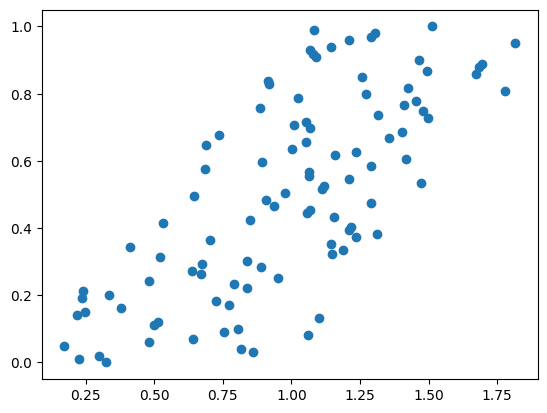

In [163]:
import numpy as np
import matplotlib.pyplot as plt

# aqui, o eixo x é gerado ao longo de uma reta, com um erro aleatório dado pela fç
# np.random.rand()
x_points = [x/100 + np.random.rand() for x in range(0, 100)]
y_points = np.linspace(0, 1, 100)

plot = plt.scatter(x_points, y_points)

Realizando um fit polinomial, podemos exemplificar o que seria um caso de *over-training*.

__Nota__: _Se fizermos um fit simples demais, como, por exemplo, 'chutar' que a distribuição de pontos segue uma reta do tipo $y=\alpha x + \beta$, corremos o risco de criar um *bias* grande. Isto é, impomos nosso *bias* (viés) no conjunto de dados._

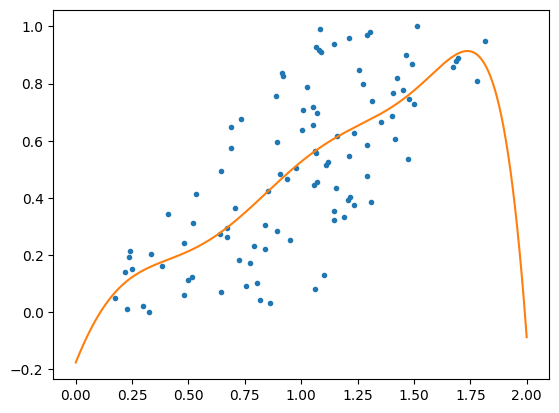

In [167]:
def fit_poly(degree, x = x_points, y = y_points):
    z = np.polyfit(x, y, degree)
    p = np.poly1d(z)

    xpoly = np.linspace(0, 2, 1000)
    plt.plot(x, y, '.', xpoly, p(xpoly))
    return plt
    
fit_poly(7)
plt.show()

Como se pode ver, os dados estão "bem" fitados pela curva, mas não necessariamente explicam o suposto modelo (lembre que os pontos foram gerados em torno da reta $y=\frac{1}{2}x$, com erro aleatório). Nós poderíamos fazer uma regressão linear/logística, ou utilizar algum outro método para encontrar a relação entre os pontos. Para efeitos lúdicos, vamos utilizar a função __fit_poly__ com grau 1.

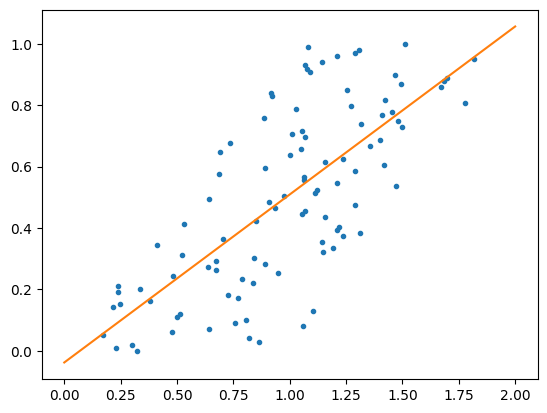

In [168]:
fit_poly(1)
plt.show()

Assim, geramos uma curva que explica bem os pontos e é muito mais simples que o polinômio de grau 7 que utilizamos anteriormente. Aqui, utiliza-se o princípio da __Navalha de Occam__: se existem duas explicações para um problema, escolha a que é mais simples.

No primeiro caso, onde houve *over-fitting*, podemos imaginar um algoritmo de aprendizado que minimizou a entropia relativa $D_{KL}$ durante o treinamento, mas que durante a fase de testes apresentou grande imprecisão. Isso acontece porque, por mais complicado e preciso no treinamento que seja, o modelo gerado pelo algoritmo não é uma boa representação do modelo real.

Os autores então introduzem o que chamam de __erro de generalização__ (o erro referente à assumir que a probabilidade calculada é a real) e o __erro empírico__, que é referente à probabilidade amostral $\hat{P}$, dada por extração direta dos dados (como $\frac{nº de casos favoráveis}{nº de casos totais}). Com isso, se tem a seguinte desiguldade:

$\text{Erro generalização }(P) \leq \text{Erro empírico }(\hat{P}) + O(\sqrt{{log(\frac{N/d_{vc}}{N/d_{vc}})}{}}$

Onde $d_{vc}$ é dimensão de *Vapnik-Chervonenkis*, definida como a medida de complexidade/poder de expressividade de um algoritmo de classificação estatístico. Isto é, quanto mais complicado um modelo de classificação, maior será $d_{vc}$. Assim, se mostra mais uma vez que um modelo muito complexo nem sempre é o mais adequado, pois a desigualdade pode assumir um valor muito alto na parte da direita quando $d_{vc}\rightarrow \infty$.

*Ao fim do notebook, acrescentamos uma nota sobre a $d_{vc}$ e essa desiguldade.*

### *Paradoxo da complexidade*
A desigualdade acima nos mostra que um modelo muito complicado pode ter um erro de generalização muito alto. Porém, existem redes complexas (como as ResNet's, exemplificada no livro, que possui centenas de camadas) que possuem precisão alta. Isso nos leva a considerar que talvez exista uma desigualdade refinada, isto é:

$\text{Erro generalização }(P) \leq (?) \leq \text{Erro empírico }(\hat{P}) + O(\sqrt{{log(\frac{N/d_{vc}}{N/d_{vc}})}{}}$

Até a presente data, esse problema permanece em aberto, com nenhuma desigualdade melhor tendo sido encontrada.



## Exemplo de minimização de $D_{KL}$ para encontrar uma distribuição aproximada
Nessa parte do código, geramos um vetor aleatório de pontos (dataset). Aí, fazemos uma distribuição amostral $\hat{P}$ e, chutando uma distribuição do tipo gaussiana, minimizamos iterativamente o gradiente do logaritmo, isto é, a função $\hat{g}$. O gradiente aqui é calculado analiticamente.

Erro:  1.599999999999997
Erro:  1.280000000000001
Erro:  1.0240000000000007
Erro:  0.8191999999999999
Erro:  0.6553600000000013
Erro:  0.5242879999999991
Erro:  0.41943040000000054
Erro:  0.3355443200000001
Erro:  0.2684354559999997
Erro:  0.21474836480000015
Erro:  0.1717986918399998
Erro:  0.13743895347199994
Erro:  0.10995116277760003
Erro:  0.08796093022208025


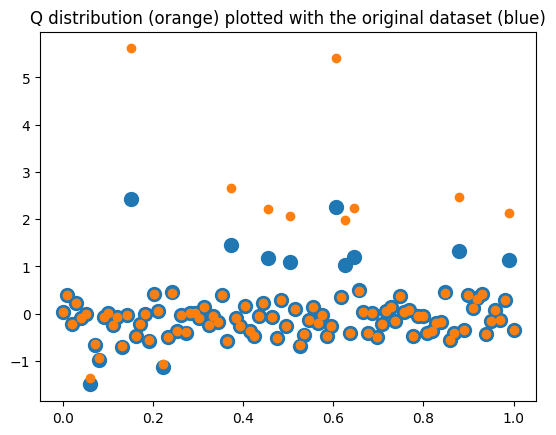

In [171]:
# generates a vector consisting of random entries 
# distribution known only to God. In this case, God chose the normal distribution
data_points = [np.random.normal(size = 5) for x in range(0,100)]
data_size = len(data_points)
p_hat = []

for points in data_points:
    mean = np.mean(points)
    # here, the vector is stored together with a label, determined by
    # the limits on the conditionals
    if mean < 0.5:
        p_hat.append([mean, 1])
    elif mean < 0.75 and mean > 0.5:
        p_hat.append([mean, 2])
    elif mean < 1 and mean > 0.75:
        p_hat.append([mean, 3])
    else: 
        p_hat.append([mean, 4])

# we guess the distribution with parameter J with the function
def Q_j(J, x, d):
    return np.exp(-J*x**2)*d*x

def g_t(x, d, J, data_size = data_size, p_hat = p_hat):
    sum_list = []
    for i in range(0, data_size):
        # here, the gradient is calculated analitically
        sum_list.append(-(1/Q_j(J, x[i], d[i]))*(-J*2*x[i]*np.exp(-J*x[i]**2)*d[i]))
    return (sum(sum_list)/data_size)

x = np.linspace(0, 1, data_size)
p_hat_means = [x[0]*x[1] for x in p_hat]
p_hat_labels = [x[1] for x in p_hat]
plt.scatter(x, p_hat_means, s=100)

error = 1
J, epsilon = 1, 0.1
while abs(error) > 10e-2:
    J = J - (epsilon*g_t(p_hat_means, p_hat_labels, J))
    error = g_t(p_hat_means, p_hat_labels, J)
    print('Erro: ', error)

guessed_prob = [Q_j(J, p_hat_means[i], p_hat_labels[i]) for i in range(0, data_size)]
plt.title('Q distribution (orange) plotted with the original dataset (blue)')
plt.scatter(x, guessed_prob)

### Notas sobre a dimensão de Vapnik-Chervonenkis

Para ficar mais claro de onde surge tal desigualdade, explicitaremos a definição formal:

__Definição (dimensão VC):__ Dada uma família de conjuntos $H=\{O_i\}$, com $i\in I \subset \mathbb{N}$ e um conjunto $C$, o conjunto $C$ é *despedaçado* por $H$ se $H \cap C = \{O_i \cap C | O_i \in H\}_{i\in I}$. Isto é, $C$ é estilhaçado se $H\cap C$ contém todos os subconjuntos de $C$. A dimensão $d_{vc}$ é a maior cardinalidade (número de elementos) de um conjunto que é despedaçado por $H$.

No nosso caso de interesse, 